In [1]:
import sys
sys.path.insert(1, '/home/ias627/tools')

In [2]:
from abg_python.snapshot_utils import openSnapshot, get_fnames
import numpy as np
import matplotlib.pyplot as plt
from itk.itk import hist

In [3]:
#h2_HR_sn1dy300ro100ss/snapdir_277

In [4]:
p0 = openSnapshot('/projects/b1026/isultan/sim/', 277, 0, loud=1)
p4 = openSnapshot('/projects/b1026/isultan/sim/', 277, 4, loud=1)

/projects/b1026/isultan/sim/snapdir_277/snapshot_277.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.1.hdf5
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.2.hdf5
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.3.hdf5
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.0.hdf5
This is a cosmological snapshot... converting to physical units
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.1.hdf5
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.2.hdf5
/projects/b1026/isultan/sim/snapdir_277/snapshot_277.3.hdf5


In [5]:
# position relative to minimum potential
pos_min_pot = p0['Coordinates'][np.argmin(p0['Potential'])]
p0['CoordinatesRelative'] = p0['Coordinates'] - pos_min_pot
p4['CoordinatesRelative'] = p4['Coordinates'] - pos_min_pot

In [6]:
# distance from halo center (particle of min. potential)
p0['r'] = np.linalg.norm(p0['CoordinatesRelative'], axis=1)
p4['r'] = np.linalg.norm(p4['CoordinatesRelative'], axis=1)

In [15]:
x0, y0 = hist(np.log10(p0['r'][p0['r']!=0]), plotFlag=False, bins=40, normed=True, range=None, normScalar=1, normCnts=True, normBinsize=True, normLogCnts=True, retEbars=False)
x0_highT, y0_highT = hist(np.log10(p0['r'][(p0['r']!=0)&(p0['Temperature']>10**4)]), plotFlag=False, bins=40, normed=True, range=None, normScalar=1, normCnts=True, normBinsize=True, normLogCnts=True, retEbars=False)
x0_lowT, y0_lowT = hist(np.log10(p0['r'][(p0['r']!=0)&(p0['Temperature']<=10**4)]), plotFlag=False, bins=40, normed=True, range=None, normScalar=1, normCnts=True, normBinsize=True, normLogCnts=True, retEbars=False)
x4, y4 = hist(np.log10(p4['r'][p4['r']!=0]), plotFlag=False, bins=40, normed=True, range=None, normScalar=1, normCnts=True, normBinsize=True, normLogCnts=True, retEbars=False)

Text(0.5, 1.0, 'z=1, h2_HR_sn1dy300ro100ss')

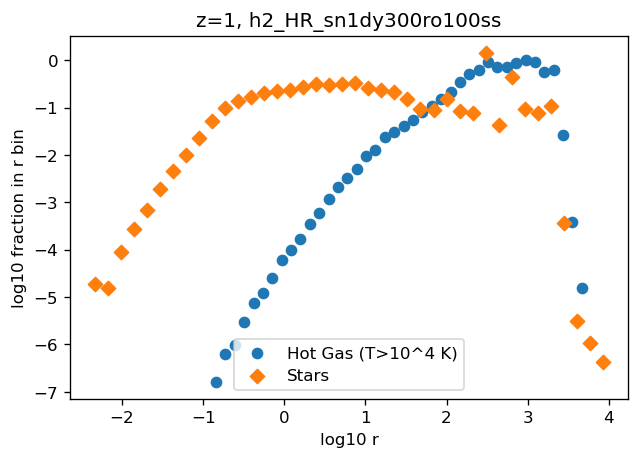

In [16]:
plt.figure(dpi=120)
# plt.scatter(x0, y0, marker='s', label='Gas')
plt.scatter(x0_highT, y0_highT, marker='o', label='Hot Gas (T>10^4 K)')
plt.scatter(x4, y4, marker='D', label='Stars')
plt.legend()
plt.xlabel('log10 r')
plt.ylabel('log10 fraction in r bin')
plt.title('z=1, h2_HR_sn1dy300ro100ss')

Text(0.5, 1.0, 'z=1, h2_HR_sn1dy300ro100ss')

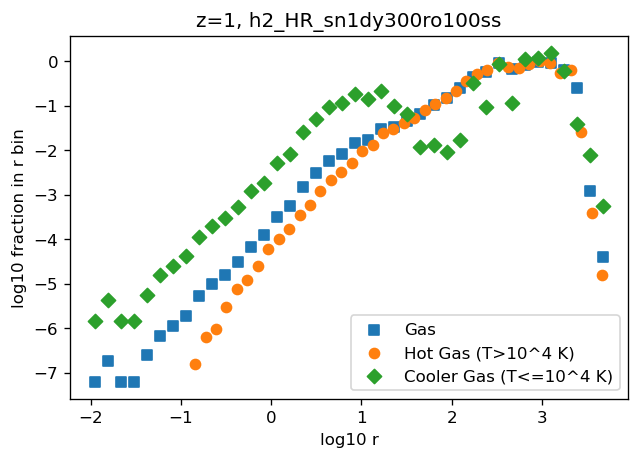

In [29]:
plt.figure(dpi=120)
plt.scatter(x0, y0, marker='s', label='Gas')
plt.scatter(x0_highT, y0_highT, marker='o', label='Hot Gas (T>10^4 K)')
plt.scatter(x0_lowT, y0_lowT, marker='D', label='Cooler Gas (T<=10^4 K)')
plt.legend()
plt.xlabel('log10 r')
plt.ylabel('log10 fraction in r bin')
plt.title('z=1, h2_HR_sn1dy300ro100ss')

### Considerations
- Halo centering: currently centering halo using gas particle with minimum potential 
- Normalization: need $R_{500c}$ and cosmic baryon fraction for comparisons with other simulations/ van de Voort et al. 2016
- Object mass: currently looking at number density of objects-- should mass be taken into account?

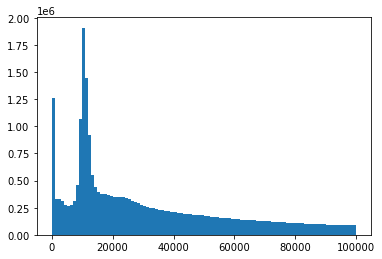

In [43]:
plt.hist(p0['Temperature'], bins=100, range = (0,1e5));

# Halo centering

In [7]:
from abg_python.cosmo_utils import load_AHF

In [8]:
posC, Rvir = load_AHF('/projects/b1026/isultan/sim/', 277, 1, hubble=p0['HubbleParam'], extra_names_to_read=[])

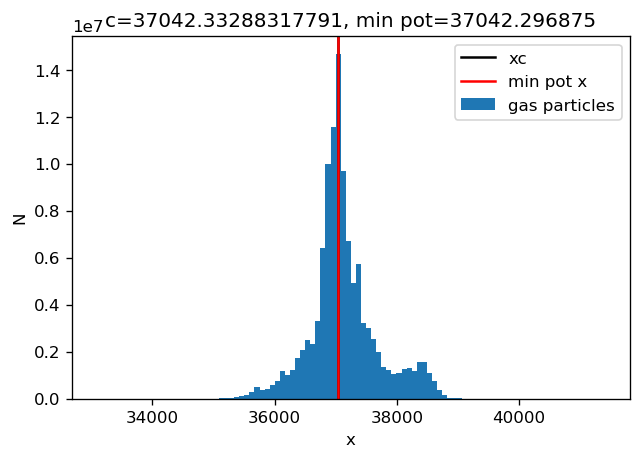

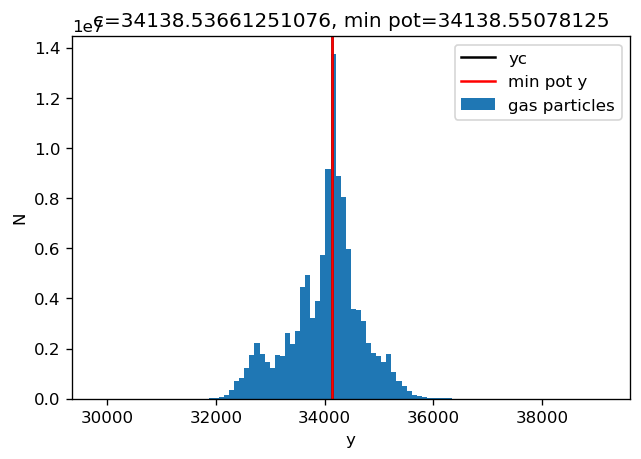

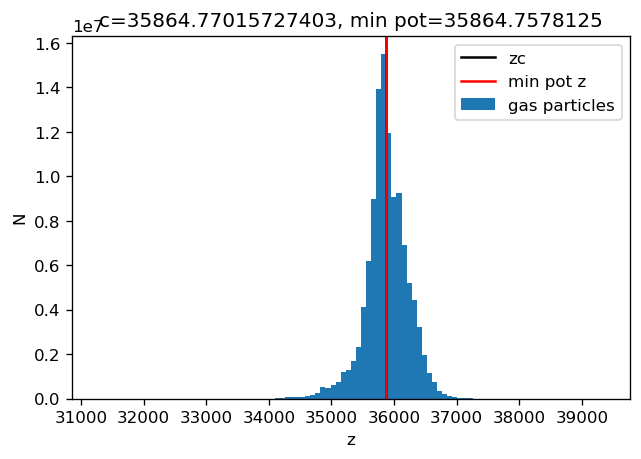

In [13]:
for i, ilbl in ( (0,'x'), (1,'y'), (2,'z') ):
    plt.figure(dpi=120)
    plt.hist(p0['Coordinates'][:,i], bins=100, label='gas particles');
    plt.axvline(posC[i], label=f'{ilbl}c', c='k')
    plt.axvline(pos_min_pot[i], label=f'min pot {ilbl}', c='r')
    plt.legend()
    plt.title(f'c={posC[i]}, min pot={pos_min_pot[i]}')
    plt.xlabel(ilbl)
    plt.ylabel('N')